In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Ensure the path matches where your file is located
df_cleaned = pd.read_csv('Cleaned_Online_Retail.csv')

# Take a look at the first few rows of the DataFrame
df_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
# Check the shape of the DataFrame
df_cleaned.shape

# Get a concise summary of the DataFrame
df_cleaned.info()

# Basic statistical details
df_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int64  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  int64  
 7   Country      392732 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.0+ MB


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822
std,13087.116747,181.588420,22.240725,1713.567773
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [4]:
# Summary of dataframe
df_cleaned.describe()


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822
std,13087.116747,181.588420,22.240725,1713.567773
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [5]:
# Check for null values
df_cleaned.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
# Understand the data types you are working with
df_cleaned.dtypes


InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

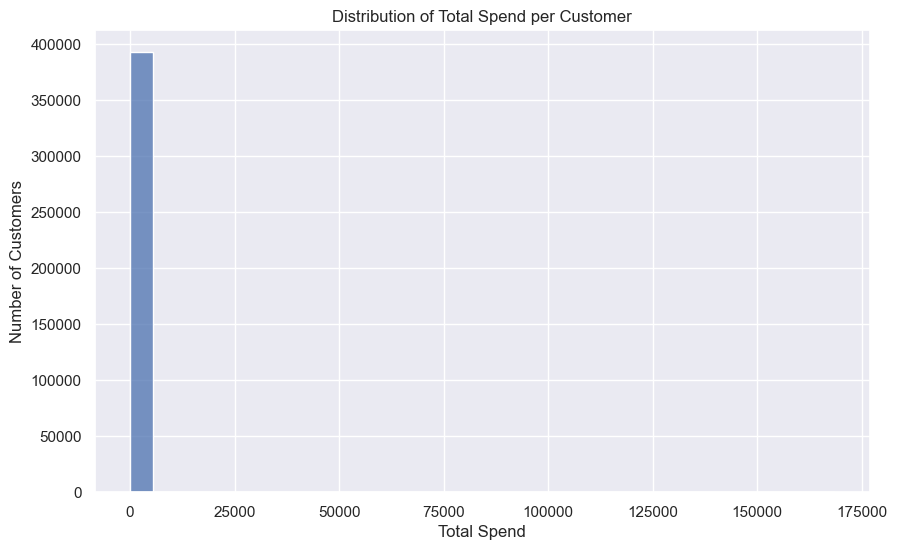

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters in one step.
sns.set()

# For example, you can plot the distribution of some numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TotalSpend'], bins=30, kde=False)
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


In [14]:
# Assuming you have 'InvoiceDate', 'InvoiceNo', and 'TotalSpend' columns
import datetime as dt

# Recency - How recently a customer purchased
snapshot_date = max(df_cleaned.InvoiceDate) + dt.timedelta(days=1)
df_rfm = df_cleaned.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'
})

df_rfm.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'TotalSpend': 'MonetaryValue'}, inplace=True)


In [15]:
import datetime as dt

# Ensure InvoiceDate is a datetime object
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Calculate snapshot_date as the day after the last purchase
snapshot_date = max(df_cleaned['InvoiceDate']) + dt.timedelta(days=1)

# Perform the aggregation to compute RFM metrics
df_rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum',
})

# Rename columns for readability
df_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'MonetaryValue',
}, inplace=True)


In [21]:
from sklearn.cluster import KMeans

# Before clustering, normalize the data
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)

# Determine the number of clusters (e.g., using the Elbow method)
# ...

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=1)  # replace 3 with the optimal number
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_scaled)

# Analyze the clusters
df_rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        247.40     27.36        634.87  1079
1          4.67   2486.00     113424.06    15
2         41.42    100.44       2003.34  3245

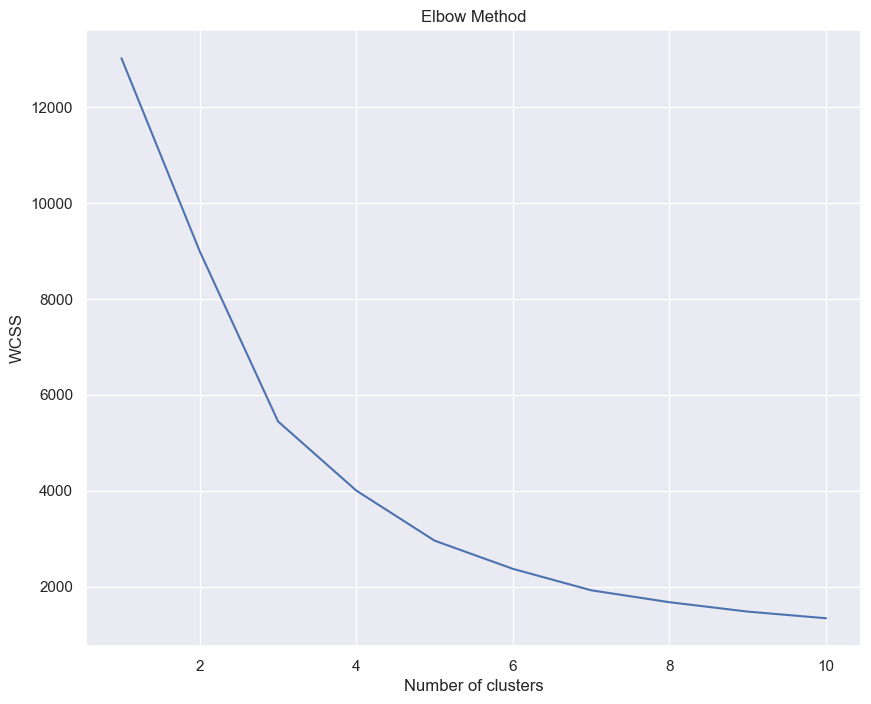

In [22]:
wcss = []
for i in range(1, 11):  # for example, testing 1-10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


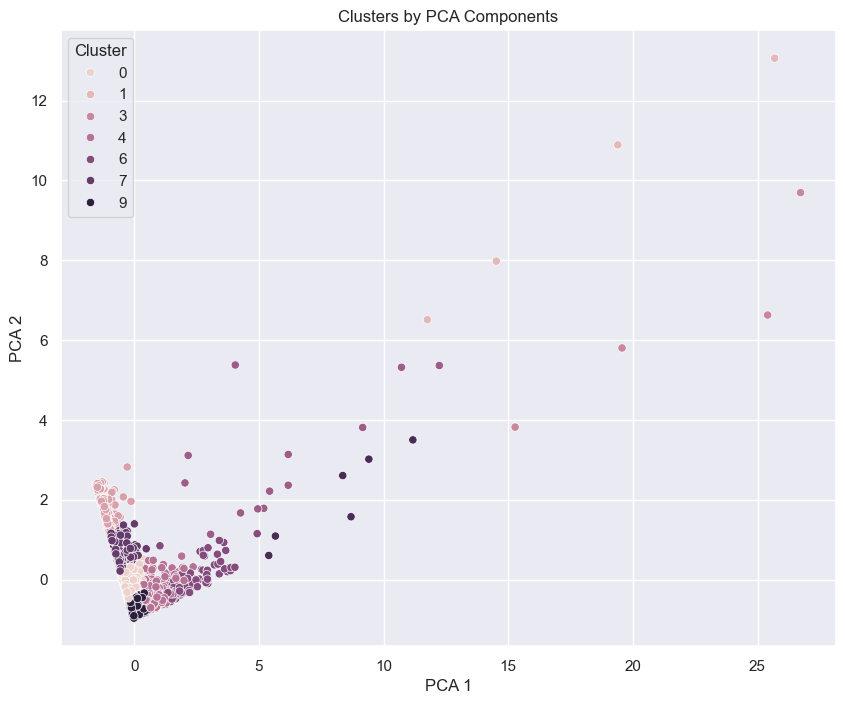

In [23]:
from sklearn.decomposition import PCA

# Reduce the data to 2 components for visualization
pca = PCA(n_components=2)
df_rfm_pca = pca.fit_transform(df_rfm_scaled)

# Scatter plot of the two principal components colored by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_rfm_pca[:, 0], y=df_rfm_pca[:, 1], hue=kmeans.labels_)
plt.title('Clusters by PCA Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


In [13]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [10]:
# Print all column names
print(df_cleaned.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSpend'],
      dtype='object')


In [9]:
# Only if you need to create a 'TotalSpend' column
df_cleaned['TotalSpend'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [ ]:
import pandas as pd

# Ensure the path matches where your file is located
df_cleaned = pd.read_csv('Cleaned_Online_Retail.csv')

# Take a look at the first few rows of the DataFrame
df_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
